In [19]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: HPQ
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


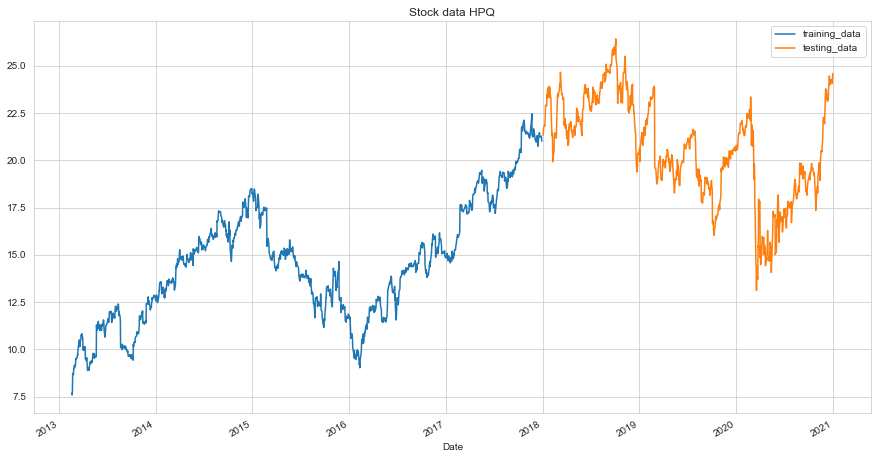

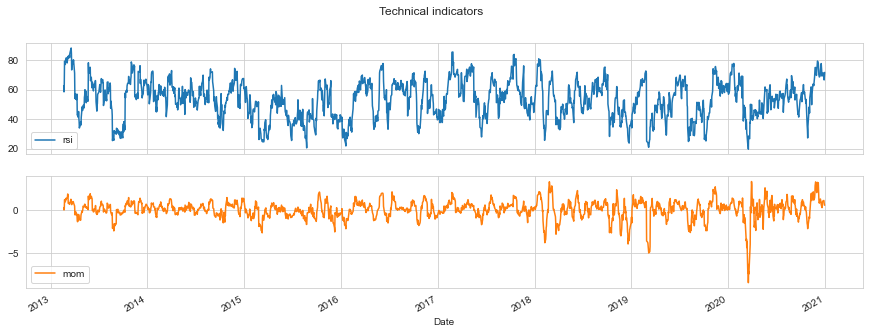

In [20]:
stock_name = 'hpq'.upper()
industry = 'Technology'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [21]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1632.77, duration: 0:00:00.192168
episode: 2/2000, episode end value: 1744.59, duration: 0:00:00.183106
episode: 3/2000, episode end value: 1703.33, duration: 0:00:00.199670
episode: 4/2000, episode end value: 1645.76, duration: 0:00:00.197822
episode: 5/2000, episode end value: 1584.26, duration: 0:00:00.191036
episode: 6/2000, episode end value: 1774.93, duration: 0:00:00.203051
episode: 7/2000, episode end value: 1596.80, duration: 0:00:00.221488
episode: 8/2000, episode end value: 1617.49, duration: 0:00:00.212486
episode: 9/2000, episode end value: 1650.96, duration: 0:00:00.204633
episode: 10/2000, episode end value: 1514.25, duration: 0:00:00.224720
episode: 11/2000, episode end value: 1456.51, duration: 0:00:00.186385
episode: 12/2000, episode end value: 1549.89, duration: 0:00:00.189920
episode: 13/2000, episode end value: 1666.38, duration: 0:00:00.202415
episode: 14/2000, episode end value: 1589.00, duration: 0:00:00.190912
episode: 15/200

episode: 117/2000, episode end value: 1594.31, duration: 0:00:00.256732
episode: 118/2000, episode end value: 1456.60, duration: 0:00:00.261554
episode: 119/2000, episode end value: 1595.18, duration: 0:00:00.240181
episode: 120/2000, episode end value: 1509.42, duration: 0:00:00.235316
episode: 121/2000, episode end value: 1513.64, duration: 0:00:00.243469
episode: 122/2000, episode end value: 1532.94, duration: 0:00:00.236329
episode: 123/2000, episode end value: 1519.57, duration: 0:00:00.243394
episode: 124/2000, episode end value: 1690.44, duration: 0:00:00.215174
episode: 125/2000, episode end value: 1617.00, duration: 0:00:00.211593
episode: 126/2000, episode end value: 1641.72, duration: 0:00:00.227006
episode: 127/2000, episode end value: 1596.65, duration: 0:00:00.221106
episode: 128/2000, episode end value: 1585.33, duration: 0:00:00.230962
episode: 129/2000, episode end value: 1622.35, duration: 0:00:00.218058
episode: 130/2000, episode end value: 1504.54, duration: 0:00:00

episode: 231/2000, episode end value: 1497.26, duration: 0:00:00.262945
episode: 232/2000, episode end value: 1492.95, duration: 0:00:00.267117
episode: 233/2000, episode end value: 1518.76, duration: 0:00:00.254856
episode: 234/2000, episode end value: 1507.77, duration: 0:00:00.291065
episode: 235/2000, episode end value: 1488.84, duration: 0:00:00.268060
episode: 236/2000, episode end value: 1435.55, duration: 0:00:00.224048
episode: 237/2000, episode end value: 1490.98, duration: 0:00:00.245269
episode: 238/2000, episode end value: 1469.35, duration: 0:00:00.248284
episode: 239/2000, episode end value: 1484.27, duration: 0:00:00.257396
episode: 240/2000, episode end value: 1480.18, duration: 0:00:00.280719
episode: 241/2000, episode end value: 1499.29, duration: 0:00:00.256532
episode: 242/2000, episode end value: 1510.11, duration: 0:00:00.212658
episode: 243/2000, episode end value: 1574.34, duration: 0:00:00.212775
episode: 244/2000, episode end value: 1569.03, duration: 0:00:00

episode: 345/2000, episode end value: 1559.92, duration: 0:00:00.292268
episode: 346/2000, episode end value: 1496.81, duration: 0:00:00.271055
episode: 347/2000, episode end value: 1538.74, duration: 0:00:00.267056
episode: 348/2000, episode end value: 1480.04, duration: 0:00:00.275061
episode: 349/2000, episode end value: 1523.32, duration: 0:00:00.276243
episode: 350/2000, episode end value: 1611.83, duration: 0:00:00.255059
episode: 351/2000, episode end value: 1594.62, duration: 0:00:00.208295
episode: 352/2000, episode end value: 1594.34, duration: 0:00:00.251126
episode: 353/2000, episode end value: 1502.03, duration: 0:00:00.219360
episode: 354/2000, episode end value: 1579.54, duration: 0:00:00.260112
episode: 355/2000, episode end value: 1457.29, duration: 0:00:00.277280
episode: 356/2000, episode end value: 1516.74, duration: 0:00:00.229799
episode: 357/2000, episode end value: 1477.10, duration: 0:00:00.237187
episode: 358/2000, episode end value: 1495.87, duration: 0:00:00

episode: 459/2000, episode end value: 1578.53, duration: 0:00:00.266540
episode: 460/2000, episode end value: 1587.67, duration: 0:00:00.245747
episode: 461/2000, episode end value: 1533.80, duration: 0:00:00.269356
episode: 462/2000, episode end value: 1509.04, duration: 0:00:00.232034
episode: 463/2000, episode end value: 1479.47, duration: 0:00:00.237388
episode: 464/2000, episode end value: 1598.89, duration: 0:00:00.265449
episode: 465/2000, episode end value: 1514.30, duration: 0:00:00.252091
episode: 466/2000, episode end value: 1498.92, duration: 0:00:00.259259
episode: 467/2000, episode end value: 1475.20, duration: 0:00:00.235493
episode: 468/2000, episode end value: 1549.03, duration: 0:00:00.217777
episode: 469/2000, episode end value: 1593.17, duration: 0:00:00.256278
episode: 470/2000, episode end value: 1593.81, duration: 0:00:00.257015
episode: 471/2000, episode end value: 1491.32, duration: 0:00:00.242778
episode: 472/2000, episode end value: 1650.61, duration: 0:00:00

episode: 574/2000, episode end value: 1618.69, duration: 0:00:00.243472
episode: 575/2000, episode end value: 1595.66, duration: 0:00:00.238826
episode: 576/2000, episode end value: 1608.23, duration: 0:00:00.244543
episode: 577/2000, episode end value: 1598.29, duration: 0:00:00.249287
episode: 578/2000, episode end value: 1585.98, duration: 0:00:00.237512
episode: 579/2000, episode end value: 1598.25, duration: 0:00:00.256007
episode: 580/2000, episode end value: 1630.22, duration: 0:00:00.246668
episode: 581/2000, episode end value: 1612.76, duration: 0:00:00.235337
episode: 582/2000, episode end value: 1597.97, duration: 0:00:00.243513
episode: 583/2000, episode end value: 1580.04, duration: 0:00:00.251059
episode: 584/2000, episode end value: 1600.96, duration: 0:00:00.246410
episode: 585/2000, episode end value: 1586.31, duration: 0:00:00.252669
episode: 586/2000, episode end value: 1472.69, duration: 0:00:00.233431
episode: 587/2000, episode end value: 1532.60, duration: 0:00:00

episode: 688/2000, episode end value: 1517.08, duration: 0:00:00.250971
episode: 689/2000, episode end value: 1542.36, duration: 0:00:00.273891
episode: 690/2000, episode end value: 1526.11, duration: 0:00:00.272813
episode: 691/2000, episode end value: 1564.82, duration: 0:00:00.229410
episode: 692/2000, episode end value: 1686.19, duration: 0:00:00.242739
episode: 693/2000, episode end value: 1583.17, duration: 0:00:00.271959
episode: 694/2000, episode end value: 1646.90, duration: 0:00:00.237752
episode: 695/2000, episode end value: 1608.39, duration: 0:00:00.297603
episode: 696/2000, episode end value: 1798.40, duration: 0:00:00.243408
episode: 697/2000, episode end value: 1563.61, duration: 0:00:00.243103
episode: 698/2000, episode end value: 1595.00, duration: 0:00:00.297643
episode: 699/2000, episode end value: 1604.35, duration: 0:00:00.314360
episode: 700/2000, episode end value: 1641.68, duration: 0:00:00.316075
episode: 701/2000, episode end value: 1489.98, duration: 0:00:00

episode: 802/2000, episode end value: 1596.85, duration: 0:00:00.242340
episode: 803/2000, episode end value: 1607.03, duration: 0:00:00.240853
episode: 804/2000, episode end value: 1522.05, duration: 0:00:00.238981
episode: 805/2000, episode end value: 1578.22, duration: 0:00:00.257596
episode: 806/2000, episode end value: 1504.68, duration: 0:00:00.258511
episode: 807/2000, episode end value: 1489.90, duration: 0:00:00.261044
episode: 808/2000, episode end value: 1523.60, duration: 0:00:00.239068
episode: 809/2000, episode end value: 1490.42, duration: 0:00:00.247056
episode: 810/2000, episode end value: 1460.02, duration: 0:00:00.197954
episode: 811/2000, episode end value: 1508.13, duration: 0:00:00.208887
episode: 812/2000, episode end value: 1438.72, duration: 0:00:00.251222
episode: 813/2000, episode end value: 1411.66, duration: 0:00:00.223036
episode: 814/2000, episode end value: 1475.67, duration: 0:00:00.250205
episode: 815/2000, episode end value: 1523.86, duration: 0:00:00

episode: 916/2000, episode end value: 1518.88, duration: 0:00:00.271130
episode: 917/2000, episode end value: 1492.20, duration: 0:00:00.289533
episode: 918/2000, episode end value: 1529.97, duration: 0:00:00.246056
episode: 919/2000, episode end value: 1506.71, duration: 0:00:00.231071
episode: 920/2000, episode end value: 1502.45, duration: 0:00:00.264040
episode: 921/2000, episode end value: 1513.92, duration: 0:00:00.240701
episode: 922/2000, episode end value: 1557.77, duration: 0:00:00.210918
episode: 923/2000, episode end value: 1606.23, duration: 0:00:00.246403
episode: 924/2000, episode end value: 1617.78, duration: 0:00:00.218825
episode: 925/2000, episode end value: 1489.50, duration: 0:00:00.264304
episode: 926/2000, episode end value: 1621.37, duration: 0:00:00.236105
episode: 927/2000, episode end value: 1567.14, duration: 0:00:00.237147
episode: 928/2000, episode end value: 1594.75, duration: 0:00:00.226670
episode: 929/2000, episode end value: 1587.50, duration: 0:00:00

episode: 1030/2000, episode end value: 1482.61, duration: 0:00:00.232509
episode: 1031/2000, episode end value: 1586.12, duration: 0:00:00.232708
episode: 1032/2000, episode end value: 1645.50, duration: 0:00:00.224802
episode: 1033/2000, episode end value: 1615.11, duration: 0:00:00.211128
episode: 1034/2000, episode end value: 1707.57, duration: 0:00:00.205155
episode: 1035/2000, episode end value: 1585.23, duration: 0:00:00.234649
episode: 1036/2000, episode end value: 1612.12, duration: 0:00:00.249971
episode: 1037/2000, episode end value: 1571.37, duration: 0:00:00.201156
episode: 1038/2000, episode end value: 1575.92, duration: 0:00:00.263709
episode: 1039/2000, episode end value: 1603.84, duration: 0:00:00.195233
episode: 1040/2000, episode end value: 1610.90, duration: 0:00:00.249696
episode: 1041/2000, episode end value: 1598.94, duration: 0:00:00.244447
episode: 1042/2000, episode end value: 1496.29, duration: 0:00:00.242340
episode: 1043/2000, episode end value: 1510.02, dur

episode: 1143/2000, episode end value: 1502.58, duration: 0:00:00.211510
episode: 1144/2000, episode end value: 1565.75, duration: 0:00:00.291240
episode: 1145/2000, episode end value: 1512.77, duration: 0:00:00.266399
episode: 1146/2000, episode end value: 1521.07, duration: 0:00:00.241261
episode: 1147/2000, episode end value: 1515.97, duration: 0:00:00.265714
episode: 1148/2000, episode end value: 1510.68, duration: 0:00:00.344988
episode: 1149/2000, episode end value: 1493.67, duration: 0:00:00.264011
episode: 1150/2000, episode end value: 1589.60, duration: 0:00:00.257711
episode: 1151/2000, episode end value: 1578.03, duration: 0:00:00.264107
episode: 1152/2000, episode end value: 1625.44, duration: 0:00:00.273063
episode: 1153/2000, episode end value: 1639.79, duration: 0:00:00.234049
episode: 1154/2000, episode end value: 1582.68, duration: 0:00:00.282755
episode: 1155/2000, episode end value: 1649.53, duration: 0:00:00.262057
episode: 1156/2000, episode end value: 1486.56, dur

episode: 1256/2000, episode end value: 1609.47, duration: 0:00:00.267062
episode: 1257/2000, episode end value: 1629.17, duration: 0:00:00.258057
episode: 1258/2000, episode end value: 1590.67, duration: 0:00:00.242072
episode: 1259/2000, episode end value: 1600.36, duration: 0:00:00.242047
episode: 1260/2000, episode end value: 1595.47, duration: 0:00:00.256057
episode: 1261/2000, episode end value: 1612.77, duration: 0:00:00.249055
episode: 1262/2000, episode end value: 1592.76, duration: 0:00:00.244070
episode: 1263/2000, episode end value: 1606.51, duration: 0:00:00.235054
episode: 1264/2000, episode end value: 1584.68, duration: 0:00:00.263073
episode: 1265/2000, episode end value: 1581.78, duration: 0:00:00.240064
episode: 1266/2000, episode end value: 1629.45, duration: 0:00:00.221037
episode: 1267/2000, episode end value: 1590.40, duration: 0:00:00.260077
episode: 1268/2000, episode end value: 1610.32, duration: 0:00:00.249037
episode: 1269/2000, episode end value: 1587.50, dur

episode: 1369/2000, episode end value: 1530.46, duration: 0:00:00.241047
episode: 1370/2000, episode end value: 1568.19, duration: 0:00:00.238054
episode: 1371/2000, episode end value: 1579.00, duration: 0:00:00.240049
episode: 1372/2000, episode end value: 1564.62, duration: 0:00:00.235053
episode: 1373/2000, episode end value: 1496.42, duration: 0:00:00.256058
episode: 1374/2000, episode end value: 1499.99, duration: 0:00:00.247069
episode: 1375/2000, episode end value: 1522.02, duration: 0:00:00.241037
episode: 1376/2000, episode end value: 1607.14, duration: 0:00:00.206061
episode: 1377/2000, episode end value: 1591.20, duration: 0:00:00.246055
episode: 1378/2000, episode end value: 1597.81, duration: 0:00:00.251041
episode: 1379/2000, episode end value: 1655.45, duration: 0:00:00.234054
episode: 1380/2000, episode end value: 1589.49, duration: 0:00:00.254069
episode: 1381/2000, episode end value: 1604.58, duration: 0:00:00.225040
episode: 1382/2000, episode end value: 1622.91, dur

episode: 1482/2000, episode end value: 1608.43, duration: 0:00:00.245039
episode: 1483/2000, episode end value: 1610.26, duration: 0:00:00.262076
episode: 1484/2000, episode end value: 1648.33, duration: 0:00:00.236038
episode: 1485/2000, episode end value: 1583.94, duration: 0:00:00.248056
episode: 1486/2000, episode end value: 1608.24, duration: 0:00:00.242066
episode: 1487/2000, episode end value: 1608.22, duration: 0:00:00.243068
episode: 1488/2000, episode end value: 1505.64, duration: 0:00:00.248039
episode: 1489/2000, episode end value: 1547.19, duration: 0:00:00.234053
episode: 1490/2000, episode end value: 1464.98, duration: 0:00:00.241054
episode: 1491/2000, episode end value: 1590.54, duration: 0:00:00.270060
episode: 1492/2000, episode end value: 1566.13, duration: 0:00:00.241045
episode: 1493/2000, episode end value: 1625.46, duration: 0:00:00.222063
episode: 1494/2000, episode end value: 1594.06, duration: 0:00:00.259045
episode: 1495/2000, episode end value: 1657.24, dur

episode: 1595/2000, episode end value: 1460.38, duration: 0:00:00.242053
episode: 1596/2000, episode end value: 1560.09, duration: 0:00:00.249057
episode: 1597/2000, episode end value: 1563.91, duration: 0:00:00.246051
episode: 1598/2000, episode end value: 1510.68, duration: 0:00:00.225051
episode: 1599/2000, episode end value: 1571.12, duration: 0:00:00.244043
episode: 1600/2000, episode end value: 1646.20, duration: 0:00:00.228067
episode: 1601/2000, episode end value: 1575.69, duration: 0:00:00.255043
episode: 1602/2000, episode end value: 1597.27, duration: 0:00:00.244058
episode: 1603/2000, episode end value: 1667.90, duration: 0:00:00.213065
episode: 1604/2000, episode end value: 1634.58, duration: 0:00:00.263039
episode: 1605/2000, episode end value: 1587.08, duration: 0:00:00.253075
episode: 1606/2000, episode end value: 1472.47, duration: 0:00:00.257036
episode: 1607/2000, episode end value: 1505.07, duration: 0:00:00.259076
episode: 1608/2000, episode end value: 1506.81, dur

episode: 1708/2000, episode end value: 1523.57, duration: 0:00:00.261060
episode: 1709/2000, episode end value: 1513.28, duration: 0:00:00.270062
episode: 1710/2000, episode end value: 1487.09, duration: 0:00:00.273079
episode: 1711/2000, episode end value: 1511.45, duration: 0:00:00.264044
episode: 1712/2000, episode end value: 1557.69, duration: 0:00:00.229040
episode: 1713/2000, episode end value: 1591.44, duration: 0:00:00.246061
episode: 1714/2000, episode end value: 1578.38, duration: 0:00:00.217045
episode: 1715/2000, episode end value: 1565.06, duration: 0:00:00.275060
episode: 1716/2000, episode end value: 1500.84, duration: 0:00:00.254055
episode: 1717/2000, episode end value: 1506.87, duration: 0:00:00.249055
episode: 1718/2000, episode end value: 1471.79, duration: 0:00:00.238053
episode: 1719/2000, episode end value: 1491.51, duration: 0:00:00.239067
episode: 1720/2000, episode end value: 1500.10, duration: 0:00:00.238046
episode: 1721/2000, episode end value: 1548.26, dur

episode: 1821/2000, episode end value: 1538.28, duration: 0:00:00.248052
episode: 1822/2000, episode end value: 1500.35, duration: 0:00:00.258044
episode: 1823/2000, episode end value: 1514.59, duration: 0:00:00.247054
episode: 1824/2000, episode end value: 1517.31, duration: 0:00:00.224068
episode: 1825/2000, episode end value: 1474.96, duration: 0:00:00.250039
episode: 1826/2000, episode end value: 1574.04, duration: 0:00:00.226050
episode: 1827/2000, episode end value: 1637.28, duration: 0:00:00.218050
episode: 1828/2000, episode end value: 1581.95, duration: 0:00:00.239054
episode: 1829/2000, episode end value: 1582.53, duration: 0:00:00.233055
episode: 1830/2000, episode end value: 1597.69, duration: 0:00:00.273054
episode: 1831/2000, episode end value: 1476.24, duration: 0:00:00.257056
episode: 1832/2000, episode end value: 1472.03, duration: 0:00:00.210049
episode: 1833/2000, episode end value: 1515.76, duration: 0:00:00.224060
episode: 1834/2000, episode end value: 1428.41, dur

episode: 1934/2000, episode end value: 1487.73, duration: 0:00:00.237047
episode: 1935/2000, episode end value: 1505.84, duration: 0:00:00.243061
episode: 1936/2000, episode end value: 1562.94, duration: 0:00:00.237052
episode: 1937/2000, episode end value: 1472.16, duration: 0:00:00.224035
episode: 1938/2000, episode end value: 1531.83, duration: 0:00:00.226065
episode: 1939/2000, episode end value: 1574.51, duration: 0:00:00.223035
episode: 1940/2000, episode end value: 1508.11, duration: 0:00:00.220064
episode: 1941/2000, episode end value: 1502.73, duration: 0:00:00.223050
episode: 1942/2000, episode end value: 1522.59, duration: 0:00:00.223049
episode: 1943/2000, episode end value: 1509.62, duration: 0:00:00.243055
episode: 1944/2000, episode end value: 1492.69, duration: 0:00:00.233063
episode: 1945/2000, episode end value: 1490.28, duration: 0:00:00.215047
episode: 1946/2000, episode end value: 1485.55, duration: 0:00:00.226052
episode: 1947/2000, episode end value: 1603.73, dur

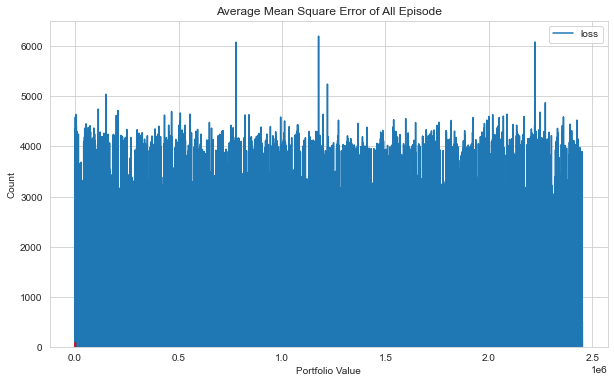

In [22]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

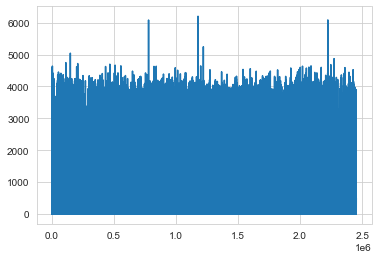

In [23]:
plt.plot(agent.model.losses)

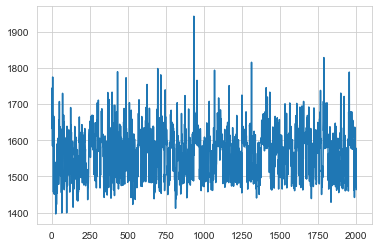

In [24]:
plt.plot(portfolio_value)

episode end value: 1276.00, duration: 0:00:00.099021
Sell: 402 times, Buy: 337 times


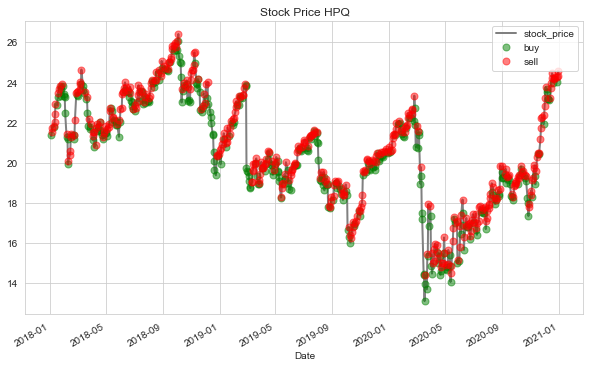

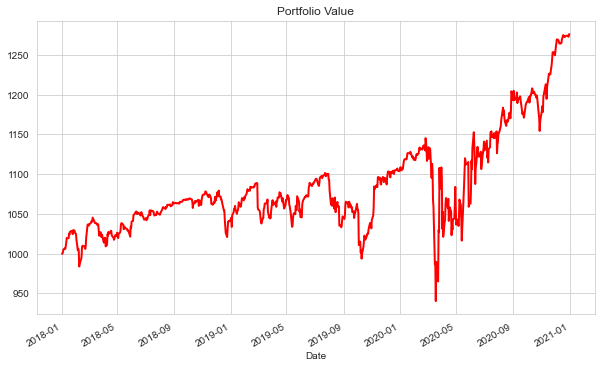

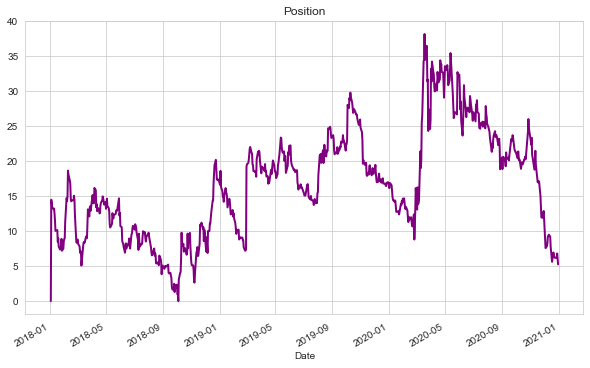

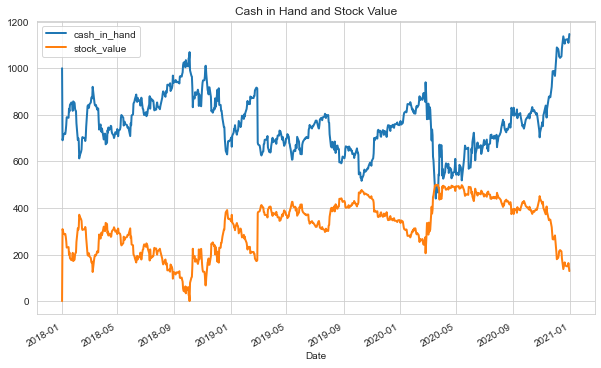

In [25]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [26]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: HPQ
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 8.46 %
Volatility: 0.1492
shape ratio: 0.4935
Maximun drawdown: -17.88 %
Calmar ratio: 0.4734
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 4.87 %
Volatility (benchmark): 0.3975
shape ratio: 0.0949
Maximun drawdown: -50.38 %
Calmar ratio (benchmark): 0.0967


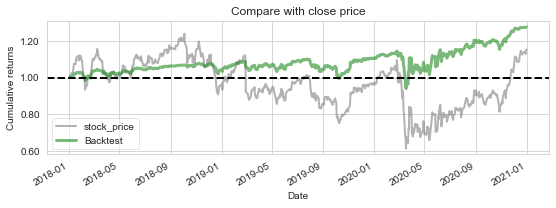

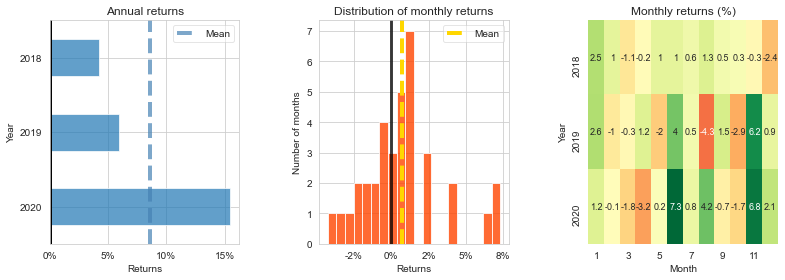

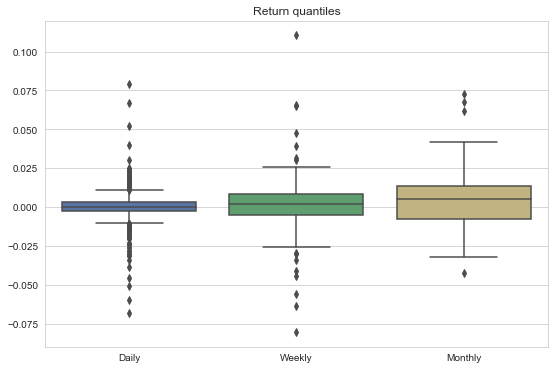

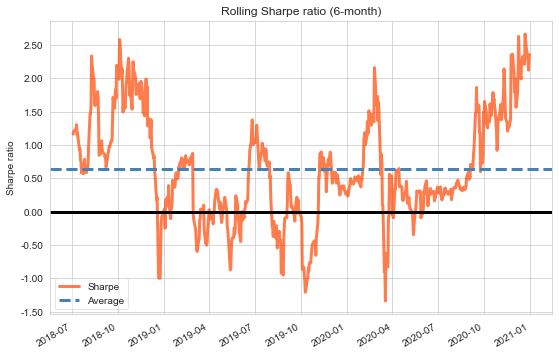

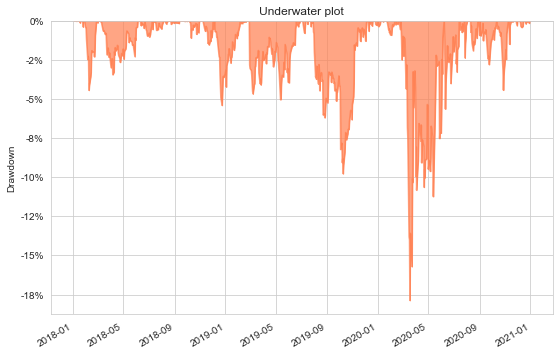

In [27]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')